# Importing data and python packages

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
import plotly.offline
import datetime
import plotly.io as pio
!pip install -U kaleido

In [237]:
airlines=pd.read_csv('airlines.csv')
airports=pd.read_csv('airports.csv')
flights=pd.read_csv('flights.csv')

C:\Users\AGATA\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.



In [238]:
airlines

IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America

In [239]:
airports.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [240]:
len(airports)

322

In [241]:
flights.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  ARRIVAL_TIME  \
0            ANC                 SEA                    5  ...         408.0   
1            LAX                 PBI                   10  ...         741.0   
2            SFO                 CLT                   20  ...         811.0   
3            LAX                 MIA                   20  ...         756.0   
4            SEA                 ANC                   25  ...         259.0   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN               NaN   
3           -9.0         0          0                  NaN               NaN   
4          -21.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 31 columns]

In [242]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [243]:
flights.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00   
min           1.000000e+00    1.000000e+00    -8.200000e+01  1.000000e+00   
25%           9.170000e+02    9.210000e+02    -5.000000e+00  1.100000e+01   
50%           1.325000e+03    1.330000e+03    -2.000000e+00  1.400000e+01   
75%           1.730000e+03    1.740000e+03     7.000000e+00  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF  ...  SCHEDULED_ARRIVAL  ARRIVAL_TIME  ARRIVAL_DELAY  \
count  5.730032e+06  ...       5.819079e+06  5.726566e+06   5.714008e+06   
mean   1.357171e+03  ...       1.493808e+03  1.476491e+03   4.407057e+00   
std    4.980094e+02  ...       5.071647e+02  5.263197e+02   3.927130e+01   
min    1.000000e+00  ...       1.000000e+00  1.000000e+00  -8.700000e+01   
25%    9.350000e+02  ...       1.110000e+03  1.059000e+03  -1.300000e+01   
50%    1.343000e+03  ...       1.520000e+03  1.512000e+03  -5.000000e+00   
75%    1.754000e+03  ...       1.918000e+03  1.917000e+03   8.000000e+00   
max    2.400000e+03  ...       2.400000e+03  2.400000e+03   1.971000e+03   

           DIVERTED     CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  \
count  5.819079e+06  5.819079e+06      1.063439e+06    1.063439e+06   
mean   2.609863e-03  1.544643e-02      1.348057e+01    7.615387e-02   
std    5.102012e-02  1.233201e-01      2.800368e+01    2.143460e+00   
min    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
25%    0.000000e+00  0.000000e+00      0.000000e+00    0.000000e+00   
50%    0.000000e+00  0.000000e+00      2.000000e+00    0.000000e+00   
75%    0.000000e+00  0.000000e+00      1.800000e+01    0.000000e+00   
max    1.000000e+00  1.000000e+00      1.134000e+03    5.730000e+02   

       AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count   1.063439e+06         1.063439e+06   1.063439e+06  
mean    1.896955e+01         2.347284e+01   2.915290e+00  
std     4.816164e+01         4.319702e+01   2.043334e+01  
min     0.000000e+00         0.000000e+00   0.000000e+00  
25%     0.000000e+00         0.000000e+00   0.000000e+00  
50%     2.000000e+00         3.000000e+00   0.000000e+00  
75%     1.900000e+01         2.900000e+01   0.000000e+00  
max     1.971000e+03         1.331000e+03   1.211000e+03  

[8 rows x 26 columns]

In [244]:
#fixing dates and hours
def hourly_format(x):
    if pd.isnull(x):
        return np.nan
    else:
        if x == 2400: x = 0
        x = "{0:04d}".format(int(x))
        hour = datetime.time(int(x[0:2]), int(x[2:4]))
        return hour
    
flights['SCHEDULED_DEPARTURE']=flights['SCHEDULED_DEPARTURE'].apply(hourly_format)
flights['DEPARTURE_TIME']=flights['DEPARTURE_TIME'].apply(hourly_format)
flights['SCHEDULED_ARRIVAL']=flights['SCHEDULED_ARRIVAL'].apply(hourly_format)
flights['ARRIVAL_TIME']=flights['ARRIVAL_TIME'].apply(hourly_format)


In [245]:
flights.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ... ARRIVAL_TIME  \
0            ANC                 SEA            00:05:00  ...     04:08:00   
1            LAX                 PBI            00:10:00  ...     07:41:00   
2            SFO                 CLT            00:20:00  ...     08:11:00   
3            LAX                 MIA            00:20:00  ...     07:56:00   
4            SEA                 ANC            00:25:00  ...     02:59:00   

   ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  AIR_SYSTEM_DELAY  \
0          -22.0         0          0                  NaN               NaN   
1           -9.0         0          0                  NaN               NaN   
2            5.0         0          0                  NaN               NaN   
3           -9.0         0          0                  NaN               NaN   
4          -21.0         0          0                  NaN               NaN   

   SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0             NaN            NaN                  NaN            NaN  
1             NaN            NaN                  NaN            NaN  
2             NaN            NaN                  NaN            NaN  
3             NaN            NaN                  NaN            NaN  
4             NaN            NaN                  NaN            NaN  

[5 rows x 31 columns]

# Missing Data

In [246]:
flights_row, flights_cols = flights.shape
missing_values_flights = flights.isnull().sum().to_frame('Missing_Values')
missing_values_flights['%_Missing'] = missing_values_flights.Missing_Values.apply(lambda x:round((x/flights_row)*100,2))
missing_values_flights.sort_values(by='%_Missing',ascending=False)

Missing_Values  %_Missing
CANCELLATION_REASON         5729195      98.46
WEATHER_DELAY               4755640      81.72
LATE_AIRCRAFT_DELAY         4755640      81.72
AIRLINE_DELAY               4755640      81.72
SECURITY_DELAY              4755640      81.72
AIR_SYSTEM_DELAY            4755640      81.72
AIR_TIME                     105071       1.81
ARRIVAL_DELAY                105071       1.81
ELAPSED_TIME                 105071       1.81
WHEELS_ON                     92513       1.59
TAXI_IN                       92513       1.59
ARRIVAL_TIME                  92513       1.59
TAXI_OUT                      89047       1.53
WHEELS_OFF                    89047       1.53
DEPARTURE_DELAY               86153       1.48
DEPARTURE_TIME                86153       1.48
TAIL_NUMBER                   14721       0.25
SCHEDULED_DEPARTURE               0       0.00
CANCELLED                         0       0.00
DAY                               0       0.00
DAY_OF_WEEK                       0       0.00
AIRLINE                           0       0.00
FLIGHT_NUMBER                     0       0.00
SCHEDULED_ARRIVAL                 0       0.00
DIVERTED                          0       0.00
ORIGIN_AIRPORT                    0       0.00
DISTANCE                          0       0.00
DESTINATION_AIRPORT               0       0.00
MONTH                             0       0.00
SCHEDULED_TIME                    6       0.00
YEAR                              0       0.00

In [247]:
#dropping columns with over 80% of missing data
cols_to_drop=['CANCELLATION_REASON', 'WEATHER_DELAY', 'LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'SECURITY_DELAY', 'AIR_SYSTEM_DELAY']
missing_values_flights=missing_values_flights.drop(cols_to_drop, axis=0)

In [248]:
missing_values_flights[missing_values_flights['%_Missing']> 0].sort_values(by='%_Missing',ascending=False)

Missing_Values  %_Missing
ELAPSED_TIME             105071       1.81
AIR_TIME                 105071       1.81
ARRIVAL_DELAY            105071       1.81
WHEELS_ON                 92513       1.59
TAXI_IN                   92513       1.59
ARRIVAL_TIME              92513       1.59
TAXI_OUT                  89047       1.53
WHEELS_OFF                89047       1.53
DEPARTURE_TIME            86153       1.48
DEPARTURE_DELAY           86153       1.48
TAIL_NUMBER               14721       0.25

In [249]:
#checking data for diverted and cancelled flights
flights['CANCELLED'].value_counts()

0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [250]:
flights['DIVERTED'].value_counts()

0    5803892
1      15187
Name: DIVERTED, dtype: int64

In [251]:
flights[flights.CANCELLED==1]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
32       2015      1    1            4      AS            136      N431AS   
42       2015      1    1            4      AA           2459      N3BDAA   
68       2015      1    1            4      OO           5254      N746SK   
82       2015      1    1            4      MQ           2859      N660MQ   
90       2015      1    1            4      OO           5460      N583SW   
...       ...    ...  ...          ...     ...            ...         ...   
5818090  2015     12   31            4      UA           1789         NaN   
5818157  2015     12   31            4      UA            222         NaN   
5818318  2015     12   31            4      AA           2245      N880AA   
5818777  2015     12   31            4      NK            416      N522NK   
5818843  2015     12   31            4      AA           1042      N870AA   

        ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ...  \
32                 ANC                 SEA            01:35:00  ...   
42                 PHX                 DFW            02:00:00  ...   
68                 MAF                 IAH            05:10:00  ...   
82                 SGF                 DFW            05:25:00  ...   
90                 RDD                 SFO            05:30:00  ...   
...                ...                 ...                 ...  ...   
5818090            IAH                 TPA            19:55:00  ...   
5818157            SFO                 LAX            20:00:00  ...   
5818318            MIA                 SAN            20:19:00  ...   
5818777            FLL                 IAG            21:55:00  ...   
5818843            SAN                 MIA            22:10:00  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
32               NaN            NaN         0          1                    A   
42               NaN            NaN         0          1                    B   
68               NaN            NaN         0          1                    B   
82               NaN            NaN         0          1                    B   
90               NaN            NaN         0          1                    A   
...              ...            ...       ...        ...                  ...   
5818090          NaN            NaN         0          1                    A   
5818157          NaN            NaN         0          1                    A   
5818318          NaN            NaN         0          1                    A   
5818777          NaN            NaN         0          1                    A   
5818843          NaN            NaN         0          1                    A   

         AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
32                    NaN             NaN            NaN                  NaN   
42                    NaN             NaN            NaN                  NaN   
68                    NaN             NaN            NaN                  NaN   
82                    NaN             NaN            NaN                  NaN   
90                    NaN             NaN            NaN                  NaN   
...                   ...             ...            ...                  ...   
5818090               NaN             NaN            NaN                  NaN   
5818157               NaN             NaN            NaN                  NaN   
5818318               NaN             NaN            NaN                  NaN   
5818777               NaN             NaN            NaN                  NaN   
5818843               NaN             NaN            NaN                  NaN   

         WEATHER_DELAY  
32                 NaN  
42                 NaN  
68                 NaN  
82                 NaN  
90                 NaN  
...                ...  
5818090            NaN  
5818157            NaN  
5818318            NaN  
5818777            NaN  
5818843   

In [252]:
flights[flights.DIVERTED==1]

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
724      2015      1    1            4      DL            716      N944DL   
1455     2015      1    1            4      OO           5237      N712SK   
2218     2015      1    1            4      WN           1966      N685SW   
2526     2015      1    1            4      EV           4555      N12552   
2866     2015      1    1            4      WN           1081      N214WN   
...       ...    ...  ...          ...     ...            ...         ...   
5813860  2015     12   31            4      UA           1291      N596UA   
5815052  2015     12   31            4      EV           2785      N684JW   
5816657  2015     12   31            4      UA            291      N76505   
5817342  2015     12   31            4      MQ           3060      N648MQ   
5818160  2015     12   31            4      WN           5296      N419WN   

        ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ...  \
724                OMA                 ATL            06:45:00  ...   
1455               MKE                 IAH            07:45:00  ...   
2218               ATL                 JAX            08:45:00  ...   
2526               IAH                 HRL            09:02:00  ...   
2866               MDW                 OKC            09:30:00  ...   
...                ...                 ...                 ...  ...   
5813860            LIH                 LAX            14:05:00  ...   
5815052            DFW                 BRO            15:30:00  ...   
5816657            IAD                 SMF            17:35:00  ...   
5817342            DFW                 FAR            18:30:00  ...   
5818160            MDW                 ABQ            20:00:00  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
724         14:51:00            NaN         1          0                  NaN   
1455        15:05:00            NaN         1          0                  NaN   
2218        12:19:00            NaN         1          0                  NaN   
2526        13:19:00            NaN         1          0                  NaN   
2866        13:43:00            NaN         1          0                  NaN   
...              ...            ...       ...        ...                  ...   
5813860          NaN            NaN         1          0                  NaN   
5815052          NaN            NaN         1          0                  NaN   
5816657     22:16:00            NaN         1          0                  NaN   
5817342     22:50:00            NaN         1          0                  NaN   
5818160     23:25:00            NaN         1          0                  NaN   

         AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
724                   NaN             NaN            NaN                  NaN   
1455                  NaN             NaN            NaN                  NaN   
2218                  NaN             NaN            NaN                  NaN   
2526                  NaN             NaN            NaN                  NaN   
2866                  NaN             NaN            NaN                  NaN   
...                   ...             ...            ...                  ...   
5813860               NaN             NaN            NaN                  NaN   
5815052               NaN             NaN            NaN                  NaN   
5816657               NaN             NaN            NaN                  NaN   
5817342               NaN             NaN            NaN                  NaN   
5818160               NaN             NaN            NaN                  NaN   

         WEATHER_DELAY  
724                NaN  
1455               NaN  
2218               NaN  
2526               NaN  
2866               NaN  
...                ...  
5813860            NaN  
5815052            NaN  
5816657            NaN  
5817342            NaN  
5818160   

In [253]:
#limiting data to not cancelled or diverted flights
flights_df=flights[(flights.CANCELLED==0) & (flights.DIVERTED==0)]

In [254]:
#deleting rows with over 80% missing data
flights_df=flights_df.drop(cols_to_drop, axis=1)

In [255]:
flights_df.isnull().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
TAIL_NUMBER            0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
TAXI_OUT               0
WHEELS_OFF             0
SCHEDULED_TIME         0
ELAPSED_TIME           0
AIR_TIME               0
DISTANCE               0
WHEELS_ON              0
TAXI_IN                0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
dtype: int64

In [256]:
flights_df=flights_df.rename(columns={'AIRLINE': 'IATA_CODE'})
flights_df=flights_df.merge(airlines, on='IATA_CODE')

In [257]:
flights_df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK IATA_CODE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4        AS             98      N407AS   
1  2015      1    1            4        AS            135      N527AS   
2  2015      1    1            4        AS            108      N309AS   
3  2015      1    1            4        AS            122      N413AS   
4  2015      1    1            4        AS            130      N457AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT SCHEDULED_DEPARTURE  ... AIR_TIME  \
0            ANC                 SEA            00:05:00  ...    169.0   
1            SEA                 ANC            00:25:00  ...    199.0   
2            ANC                 SEA            00:45:00  ...    173.0   
3            ANC                 PDX            00:50:00  ...    187.0   
4            FAI                 SEA            01:15:00  ...    186.0   

   DISTANCE  WHEELS_ON  TAXI_IN  SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
0      1448      404.0      4.0           04:30:00      04:08:00   
1      1448      254.0      5.0           03:20:00      02:59:00   
2      1448      451.0      4.0           05:09:00      04:55:00   
3      1542      504.0      3.0           05:25:00      05:07:00   
4      1533      538.0      7.0           05:48:00      05:45:00   

   ARRIVAL_DELAY  DIVERTED  CANCELLED               AIRLINE  
0          -22.0         0          0  Alaska Airlines Inc.  
1          -21.0         0          0  Alaska Airlines Inc.  
2          -14.0         0          0  Alaska Airlines Inc.  
3          -18.0         0          0  Alaska Airlines Inc.  
4           -3.0         0          0  Alaska Airlines Inc.  

[5 rows x 26 columns]

# Exploratory Data Analysis

## Exploration of arrival delays for particular airlines

In [258]:
#airlines with the most flights
airlines_count=pd.DataFrame(flights_df.groupby('AIRLINE')['AIRLINE'].count().sort_values())

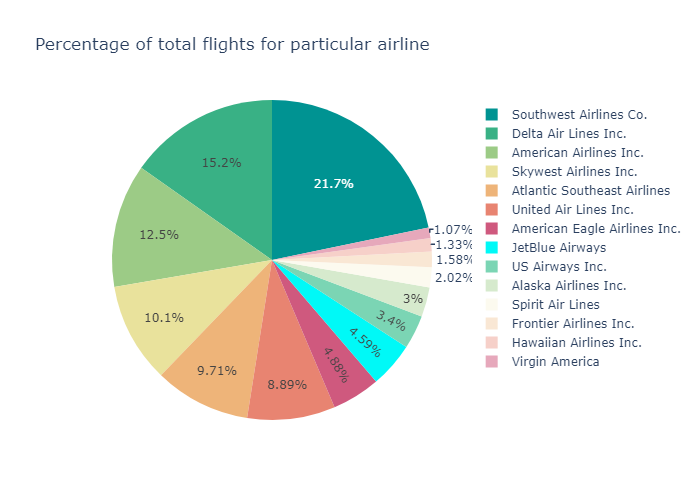

In [259]:
fig=px.pie(airlines_count, values=airlines_count['AIRLINE'], names=airlines_count.index, title="Percentage of total flights for particular airline",color_discrete_sequence=px.colors.diverging.Temps)

fig.show('png')

In [260]:
arrdelay_df=pd.DataFrame(flights_df.groupby('AIRLINE')['ARRIVAL_DELAY'].mean())

In [261]:
arrdelay_df=arrdelay_df.sort_values(by='ARRIVAL_DELAY', ascending=False)

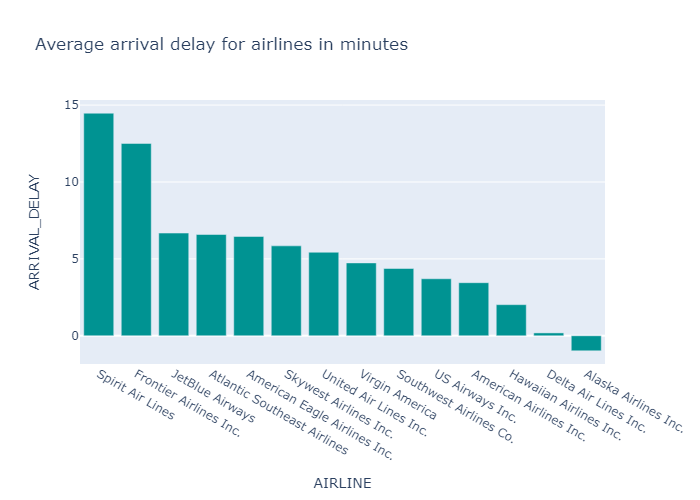

In [262]:
fig=px.bar(arrdelay_df, x=arrdelay_df.index, y=arrdelay_df['ARRIVAL_DELAY'], title="Average arrival delay for airlines in minutes", color_discrete_sequence=px.colors.diverging.Temps)
fig.show('png')

Text(0.5, 1.0, 'Arrival delays in minutes for airlines')

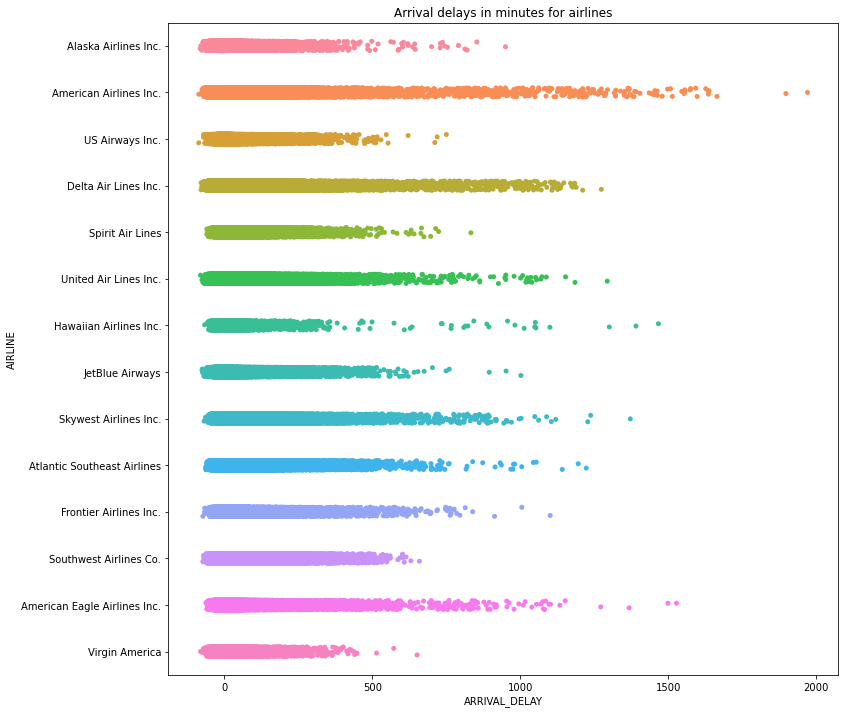

In [263]:
f, ax = plt.subplots(figsize=(12, 12))


sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=flights_df, dodge=True, jitter=True
            )
ax.set_title('Arrival delays in minutes for airlines')

In [264]:
flights_df['DELAYED'] = flights_df['ARRIVAL_DELAY'].apply(lambda x: 1 if x > 0 else 0)

In [265]:
arr_delay_airline_count=flights_df.groupby('AIRLINE')['DELAYED'].sum()
arr_delay_airline_count_df=pd.DataFrame(arr_delay_airline_count.sort_values())
airlines_delay_pct=airlines_count.merge(arr_delay_airline_count_df, on=arr_delay_airline_count_df.index)

In [266]:
airlines_delay_pct.columns=['Airline', 'Total Flights', 'Delayed Flights']

In [267]:
airlines_delay_pct['%_Delayed']=round(airlines_delay_pct['Delayed Flights']/airlines_delay_pct['Total Flights']*100,2)
airlines_delay_pct=airlines_delay_pct.sort_values(by='Delayed Flights', ascending=False)

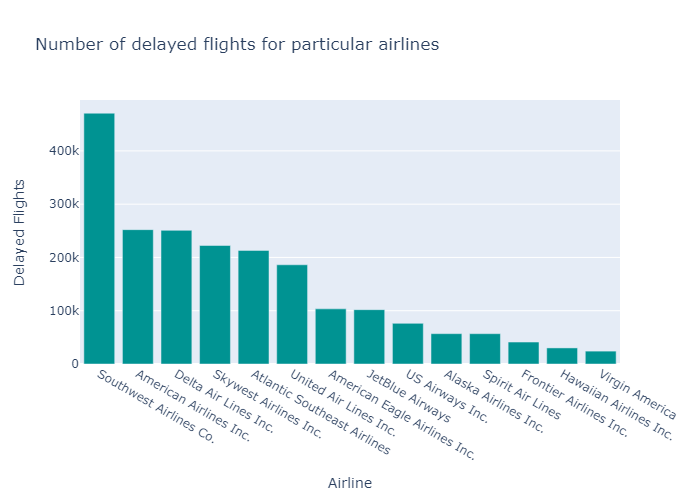

In [268]:
fig=px.bar(airlines_delay_pct, x=airlines_delay_pct['Airline'], y=airlines_delay_pct['Delayed Flights'], title="Number of delayed flights for particular airlines", color_discrete_sequence=px.colors.diverging.Temps)
fig.show('png')

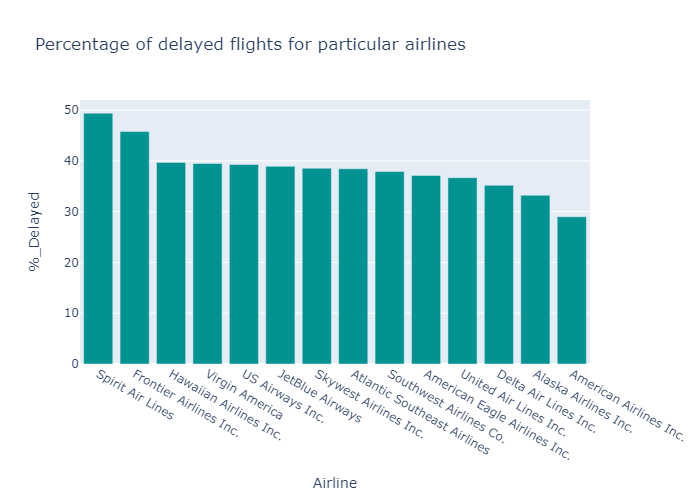

In [269]:
airlines_delay_pct=airlines_delay_pct.sort_values(by='%_Delayed', ascending=False)
fig=px.bar(airlines_delay_pct, x=airlines_delay_pct['Airline'], y=airlines_delay_pct['%_Delayed'], title="Percentage of delayed flights for particular airlines", color_discrete_sequence=px.colors.diverging.Temps)
fig.show('png')

## Exploration of arrival delays for particular dates

In [270]:
arr_delay_day=pd.DataFrame(flights_df.groupby('DAY_OF_WEEK')['DELAYED'].sum())
arr_delay_day=arr_delay_day.merge(pd.DataFrame(flights_df.groupby('DAY_OF_WEEK')['DELAYED'].count()), on=arr_delay_day.index)

In [271]:
arr_delay_day.columns=['Day of week', 'Delayed Flights', 'Total Flights']

In [272]:
arr_delay_day['%_Delayed']=round(arr_delay_day['Delayed Flights']/arr_delay_day['Total Flights']*100,2)

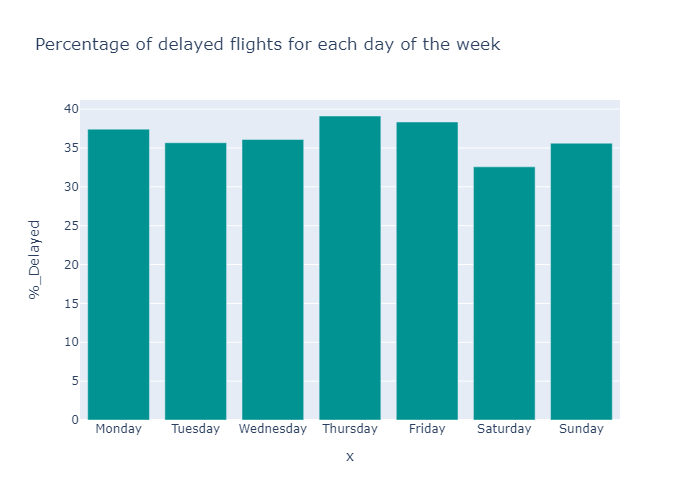

In [273]:
fig=px.bar(arr_delay_day, x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], y=arr_delay_day['%_Delayed'], title="Percentage of delayed flights for each day of the week", color_discrete_sequence=px.colors.diverging.Temps)
fig.show('png')

In [274]:
arr_delay_month=pd.DataFrame(flights_df.groupby('MONTH')['DELAYED'].sum())
arr_delay_month=arr_delay_month.merge(flights_df.groupby('MONTH')['DELAYED'].count(), on=arr_delay_month.index)
arr_delay_month.columns=['Month', 'Delayed Flights', 'Total Flights']
arr_delay_month['%_Delayed']=round(arr_delay_month['Delayed Flights']/arr_delay_month['Total Flights']*100,2)

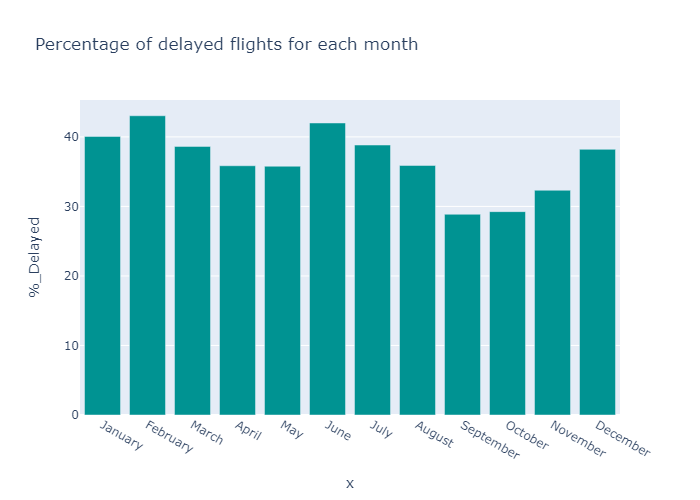

In [275]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig=px.bar(arr_delay_month, x=months, y=arr_delay_month['%_Delayed'], title="Percentage of delayed flights for each month", color_discrete_sequence=px.colors.diverging.Temps)
fig.show('png')

## Exploration of reasons of delays

In [276]:
arr_delay_reason=pd.DataFrame(flights.groupby('AIRLINE')['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'].count())

<ipython-input-276-f25462e07d0f>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [277]:
flights1=flights.rename(columns={'AIRLINE': 'IATA_CODE'})
flights1=flights1.merge(airlines, on='IATA_CODE')

count_delay_reason = flights1.loc[:, ['AIRLINE', 'AIR_SYSTEM_DELAY',
                                             'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                                             'SECURITY_DELAY', 'WEATHER_DELAY'
                                            ]]
count_delay_reason.set_index('AIRLINE', inplace=True)
count_delay_reason = round(100*(((count_delay_reason>0).reset_index().groupby('AIRLINE').sum())
                      /count_delay_reason.groupby('AIRLINE').count()),2)
count_delay_reason

AIR_SYSTEM_DELAY  AIRLINE_DELAY  \
AIRLINE                                                         
Alaska Airlines Inc.                     66.65          37.41   
American Airlines Inc.                   54.02          52.70   
American Eagle Airlines Inc.             59.14          44.98   
Atlantic Southeast Airlines              58.24          49.41   
Delta Air Lines Inc.                     54.42          53.49   
Frontier Airlines Inc.                   76.65          48.86   
Hawaiian Airlines Inc.                    3.77          85.81   
JetBlue Airways                          57.31          65.34   
Skywest Airlines Inc.                    54.28          36.30   
Southwest Airlines Co.                   41.32          61.08   
Spirit Air Lines                         82.93          50.57   
US Airways Inc.                          64.87          53.95   
United Air Lines Inc.                    47.61          63.02   
Virgin America                           45.81          37.74   

                              LATE_AIRCRAFT_DELAY  SECURITY_DELAY  \
AIRLINE                                                             
Alaska Airlines Inc.                        35.19            1.12   
American Airlines Inc.                      44.21            0.56   
American Eagle Airlines Inc.                53.06            0.51   
Atlantic Southeast Airlines                 50.19            0.00   
Delta Air Lines Inc.                        42.46            0.05   
Frontier Airlines Inc.                      49.38            0.00   
Hawaiian Airlines Inc.                      56.59            0.34   
JetBlue Airways                             53.54            0.73   
Skywest Airlines Inc.                       57.92            0.32   
Southwest Airlines Co.                      68.96            0.23   
Spirit Air Lines                            34.25            0.87   
US Airways Inc.                             37.36            1.02   
United Air Lines Inc.                       47.62            0.02   
Virgin America                              45.81            0.67   

                              WEATHER_DELAY  
AIRLINE                                      
Alaska Airlines Inc.                   3.88  
American Airlines Inc.                 7.65  
American Eagle Airlines Inc.          15.04  
Atlantic Southeast Airlines            2.61  
Delta Air Lines Inc.                  10.03  
Frontier Airlines Inc.                 2.46  
Hawaiian Airlines Inc.                 6.64  
JetBlue Airways                        3.67  
Skywest Airlines Inc.                  4.11  
Southwest Airlines Co.                 4.26  
Spirit Air Lines                       2.70  
US Airways Inc.                        4.71  
United Air Lines Inc.                  7.19  
Virgin America                        17.59

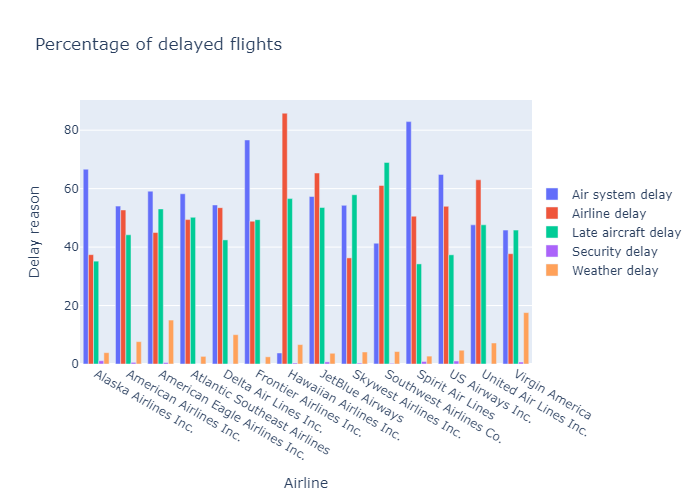

In [278]:
trace1 = go.Bar(x=count_delay_reason.index, y=count_delay_reason["AIR_SYSTEM_DELAY"], name="Air system delay")
trace2 = go.Bar(x=count_delay_reason.index, y=count_delay_reason["AIRLINE_DELAY"], name="Airline delay")
trace3 = go.Bar(x=count_delay_reason.index, y=count_delay_reason["LATE_AIRCRAFT_DELAY"], name="Late aircraft delay")
trace4 = go.Bar(x=count_delay_reason.index, y=count_delay_reason["SECURITY_DELAY"], name="Security delay")
trace5 = go.Bar(x=count_delay_reason.index, y=count_delay_reason["WEATHER_DELAY"], name="Weather delay")

data = [trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(title="Percentage of delayed flights",
                   xaxis=dict(title="Airline"),
                   yaxis=dict(title="Delay reason"),
                   legend=dict(x=1.0, y=0.5),

                   annotations=[
                                dict(
                                    x=1.55,
                                    y=0.55,
                                    xref="paper",
                                    yref="paper",
                                    text='Delay reason',
                                    showarrow=False
                                )],
                   barmode="group")

fig = go.Figure(data=data, layout=layout)
fig.show('png')

## Exploration of delays on particular airports

### Origin airports

In [279]:
delay_org_port=pd.DataFrame(flights_df.groupby('ORIGIN_AIRPORT')['DELAYED'].sum())

In [280]:
delay_org_port=delay_org_port.merge(flights_df.groupby('ORIGIN_AIRPORT')['DELAYED'].count(), on=delay_org_port.index)

In [281]:
delay_org_port.columns=['Airport', 'Delayed Flights', 'Total Flights']

In [282]:
delay_org_port=delay_org_port.rename(columns={'Airport': 'IATA_CODE'})
delay_org_port=delay_org_port.merge(airports, on='IATA_CODE')

In [283]:
delay_org_port['%_Delayed']=round(delay_org_port['Delayed Flights']/delay_org_port['Total Flights']*100,2)

In [284]:
delay_org_port=delay_org_port.sort_values(by='Total Flights', ascending=False)

In [285]:
delay_org_port=delay_org_port.dropna()

In [286]:
delay_org_port

IATA_CODE  Delayed Flights  Total Flights  \
20        ATL           114872         343506   
228       ORD           113281         276554   
86        DFW            93054         232647   
85        DEN            80756         193402   
176       LAX            79661         192003   
..        ...              ...            ...   
293       STC               38             77   
89        DLG               17             77   
133       GST               51             76   
13        AKN               32             63   
161       ITH               14             30   

                                              AIRPORT               CITY  \
20   Hartsfield-Jackson Atlanta International Airport            Atlanta   
228              Chicago O'Hare International Airport            Chicago   
86            Dallas/Fort Worth International Airport  Dallas-Fort Worth   
85                       Denver International Airport             Denver   
176                 Los Angeles International Airport        Los Angeles   
..                                                ...                ...   
293                        St. Cloud Regional Airport           St Cloud   
89                                 Dillingham Airport         Dillingham   
133                                  Gustavus Airport           Gustavus   
13                                King Salmon Airport        King Salmon   
161                  Ithaca Tompkins Regional Airport             Ithaca   

    STATE COUNTRY  LATITUDE  LONGITUDE  %_Delayed  
20     GA     USA  33.64044  -84.42694      33.44  
228    IL     USA  41.97960  -87.90446      40.96  
86     TX     USA  32.89595  -97.03720      40.00  
85     CO     USA  39.85841 -104.66700      41.76  
176    CA     USA  33.94254 -118.40807      41.49  
..    ...     ...       ...        ...        ...  
293    MN     USA  45.54532  -94.05834      49.35  
89     AK     USA  59.04541 -158.50334      22.08  
133    AK     USA  58.42438 -135.70738      67.11  
13     AK     USA  58.67680 -156.64922      50.79  
161    NY     USA  42.49103  -76.45844      46.67  

[319 rows x 10 columns]

In [287]:
px.set_mapbox_access_token("pk.eyJ1IjoiYWdhdG9zeiIsImEiOiJja3RzemU3cnowMzZ6MnBtcjdpMmYwbWRzIn0.HIazu1v8aLgMpNWlS2DnaA")

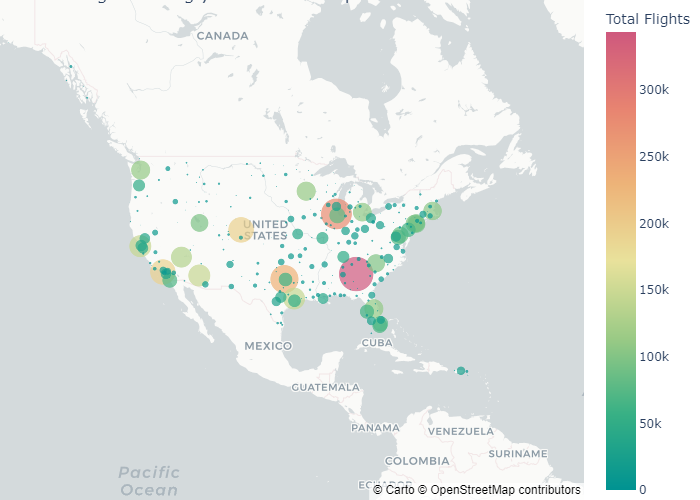

In [288]:
fig = px.scatter_mapbox(delay_org_port, lat="LATITUDE", lon="LONGITUDE",     color="Total Flights", size="Total Flights",
                  color_continuous_scale=px.colors.diverging.Temps, size_max=25, zoom=10, hover_name='AIRPORT', title='Total flights during year 2015 for airports')
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=2, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show('png')

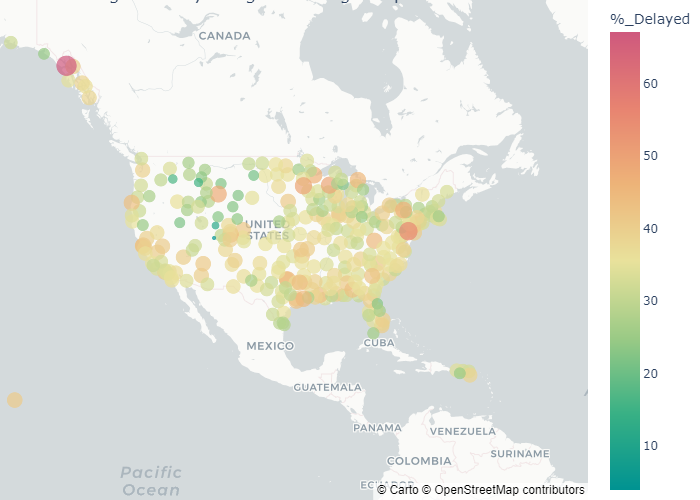

In [289]:
fig = px.scatter_mapbox(delay_org_port, lat="LATITUDE", lon="LONGITUDE",     color="%_Delayed", size="%_Delayed",
                  color_continuous_scale=px.colors.diverging.Temps, size_max=15, zoom=10, hover_name='AIRPORT', title='Percentage of delayed flights for origin airports')
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=2, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show('png')

### Destination airports

In [290]:
delay_des_port=pd.DataFrame(flights_df.groupby('DESTINATION_AIRPORT')['DELAYED'].sum())

In [291]:
delay_des_port=delay_des_port.merge(flights_df.groupby('DESTINATION_AIRPORT')['DELAYED'].count(), on=delay_des_port.index)

In [292]:
delay_des_port.columns=['IATA_CODE', 'Delayed Flights', 'Total Flights']
delay_des_port=delay_des_port.merge(airports, on='IATA_CODE')

In [293]:
delay_des_port['%_Delayed']=round(delay_des_port['Delayed Flights']/delay_des_port['Total Flights']*100,2)
delay_des_port=delay_des_port.sort_values(by='Total Flights', ascending=False)
delay_des_port=delay_des_port.dropna()

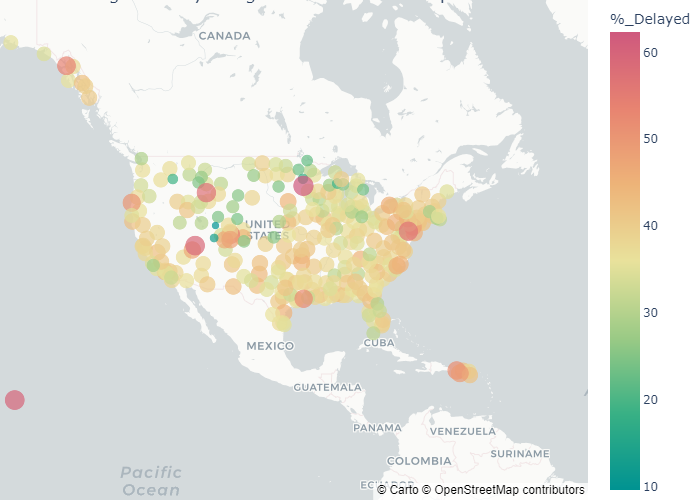

In [294]:
fig = px.scatter_mapbox(delay_des_port, lat="LATITUDE", lon="LONGITUDE",     color="%_Delayed", size="%_Delayed",
                  color_continuous_scale=px.colors.diverging.Temps, size_max=15, zoom=10, hover_name='AIRPORT', title='Percentage of delayed flights for destination airports')
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=2, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show('png')

## Choosing variables for model

<AxesSubplot:>

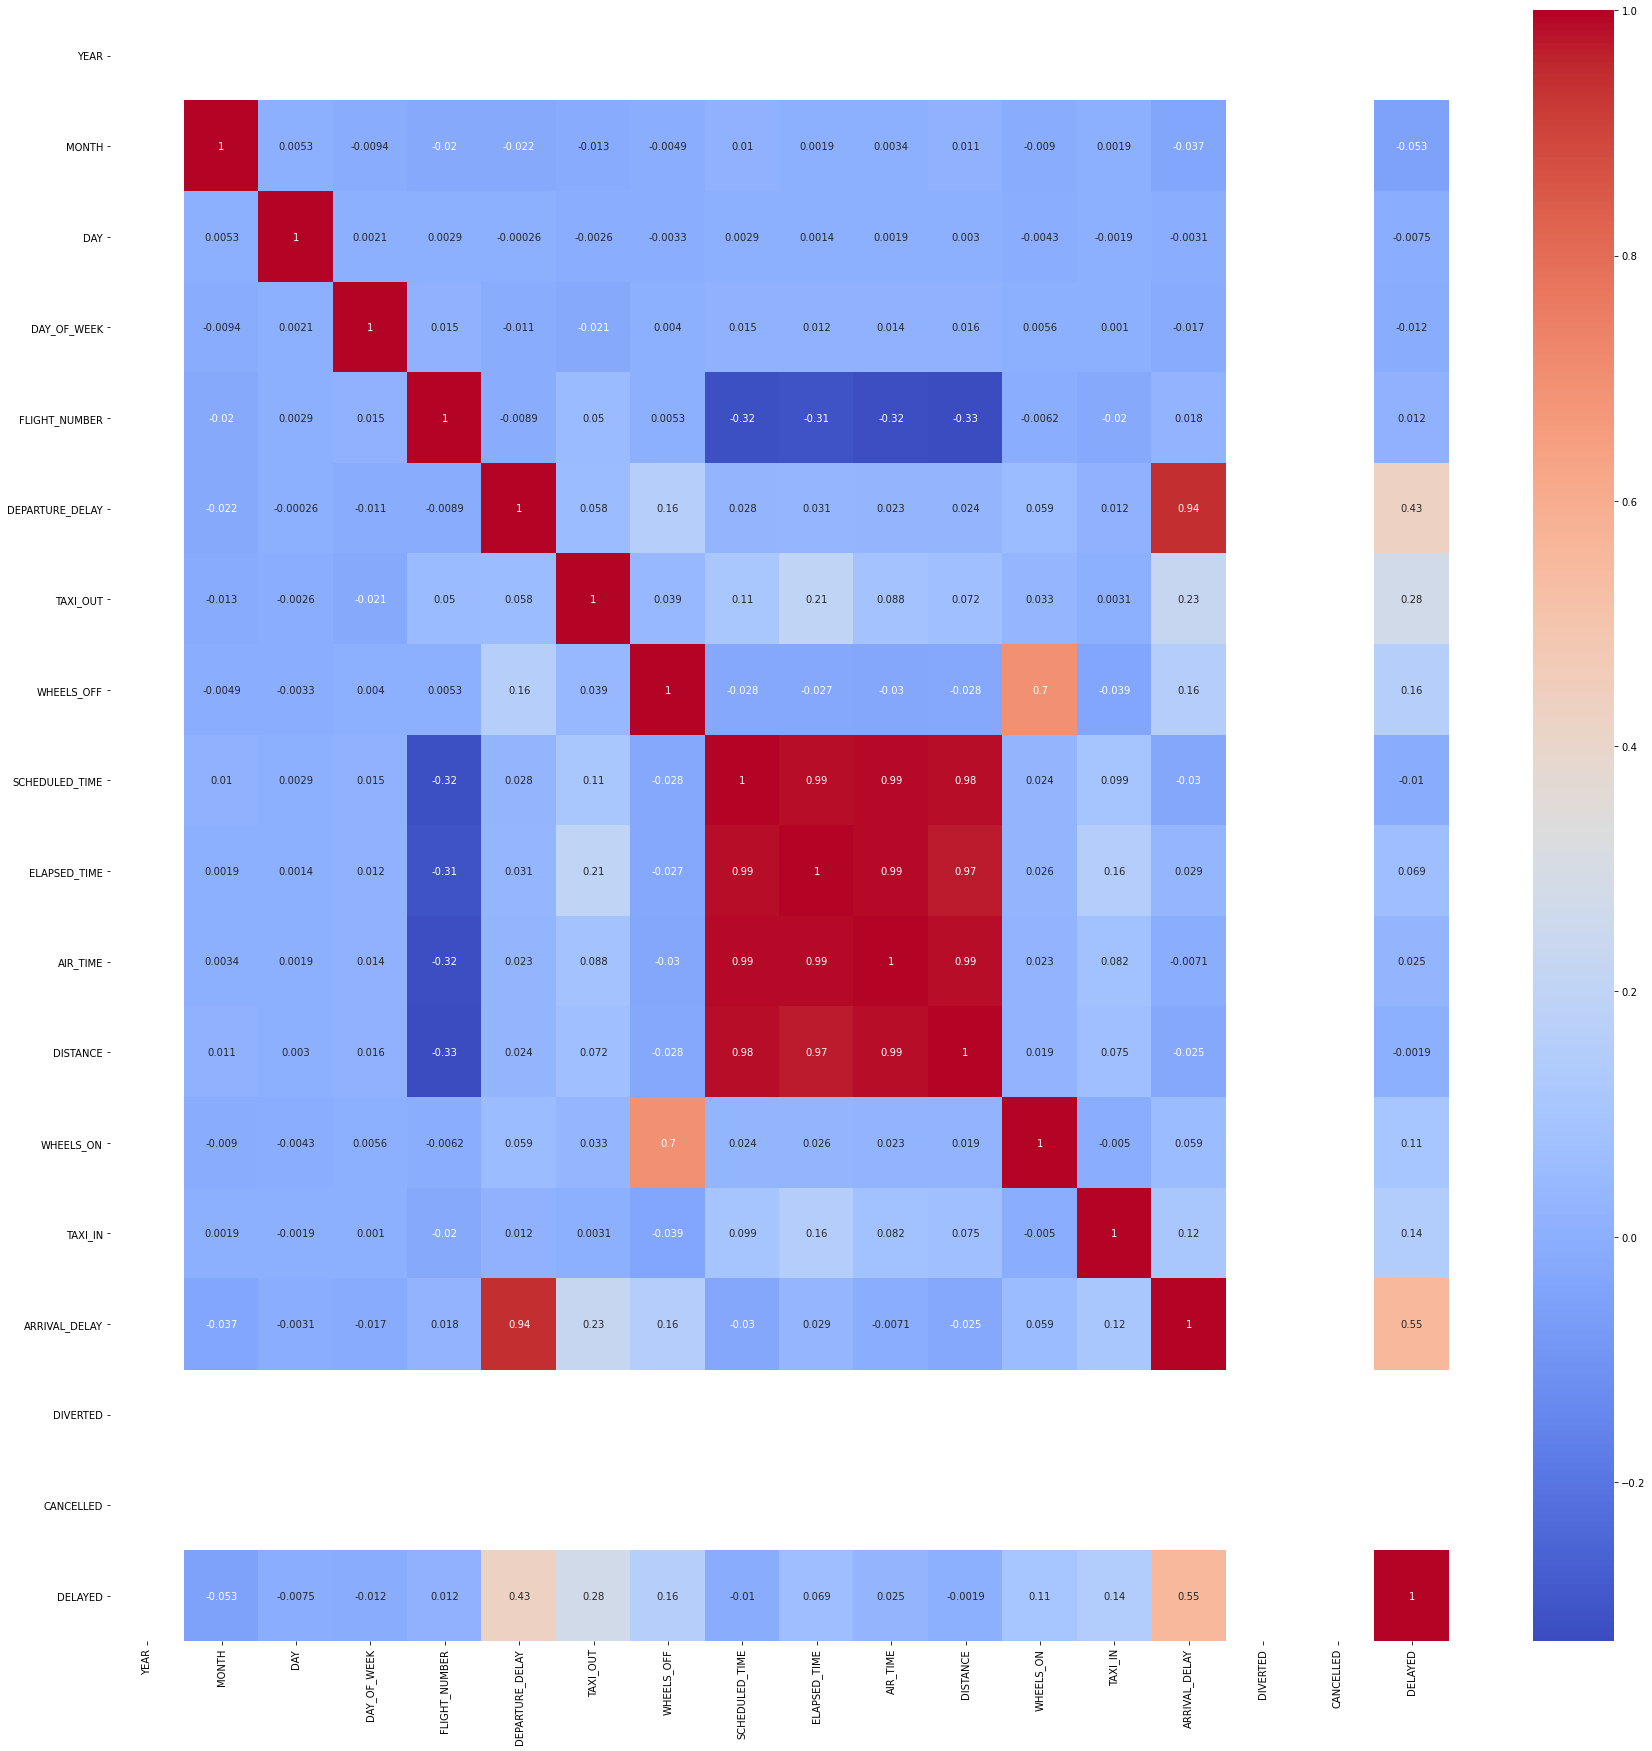

In [295]:
fig, ax = plt.subplots(figsize=(30,30)) 
sns.heatmap(flights_df.corr(), annot=True, cmap='coolwarm')

According to explanation of variables given on Kaggle:
- SCHEDULED_DEPARTURE: Planned Departure Time
- DEPARTURE_TIME: WHEEL_OFF - TAXI_OUT
- DEPARTURE_DELAY: Total Delay on Departure
- TAXI_OUT: The time duration elapsed between departure from the origin airport gate and wheels off
- WHEELS_OFF: The time point that the aircraft's wheels leave the ground
- SCHEDULED_TIME: Planned time amount needed for the flight trip
- ELAPSED_TIME: AIR_TIME + TAXI_IN + TAXI_OUT
- AIR_TIME: The time duration between wheels_off and wheels_on time
- DISTANCE: Distance between two airports
- WHEELS_ON: The time point that the aircraft's wheels touch on the ground
- TAXI_IN: The time duration elapsed between wheels-on and gate arrival at the destination airport
- SCHEDULED_ARRIVAL: Planned arrival time
- ARRIVAL_TIME: WHEELS_ON + TAXI_IN
- ARRIVAL_DELAY: ARRIVAL_TIME - SCHEDULED_ARRIVAL

I will predict arrival delay based on variables such as: 
'AIRLINE', 'MONTH', 'DEPARTURE_DELAY','SCHEDULED_TIME'.

In [296]:
flights_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'IATA_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'AIRLINE', 'DELAYED'],
      dtype='object')

In [297]:
#limiting dataset to records with delays
flights_df=flights_df[flights_df.DELAYED==1]

In [298]:
flights_df['MONTH']=flights_df['MONTH'].apply(lambda x: str(x))

In [299]:
# deleting uneccessary columns
cols_to_delete=['YEAR', 'DAY', 'DAY_OF_WEEK', 'IATA_CODE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',  'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_ARRIVAL', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN',  'ARRIVAL_TIME',
        'DIVERTED', 'CANCELLED',  'DELAYED']
flights_df=flights_df.drop(cols_to_delete, axis=1)


# Regression models

## Preparing data for analysis

In [300]:
flights_df.columns

Index(['MONTH', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'ARRIVAL_DELAY',
       'AIRLINE'],
      dtype='object')

In [301]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [302]:
# assigning variables
X_num=flights_df[['DEPARTURE_DELAY', 'SCHEDULED_TIME']]
y=flights_df['ARRIVAL_DELAY']
y_tree=flights_df['ARRIVAL_DELAY']
X=flights_df[['MONTH', 'DEPARTURE_DELAY', 'SCHEDULED_TIME',
       'AIRLINE']]


In [303]:
#scaling data
scaler = StandardScaler()
numeric_transformer=Pipeline(steps=[('scaler', StandardScaler())])

cat_transformer=OneHotEncoder(handle_unknown='ignore')
preprocessor=ColumnTransformer(transformers=[
      ('num', numeric_transformer, X_num.select_dtypes(exclude="object").columns),
      ('cat', cat_transformer, flights_df[['AIRLINE', 'MONTH']].select_dtypes(include="object").columns)
])


In [304]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)
X_train_scaled=preprocessor.fit_transform(X_train)
X_test_scaled=preprocessor.transform(X_test)
X_val_scaled=preprocessor.transform(X_val)


In [305]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## LassoCV

In [306]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10])
lassocv.fit(X_train_scaled, y_train)

C:\Users\AGATA\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 31641302.67669463, tolerance: 347552.5915047935



LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10])

In [307]:
y_pred_lcv=lassocv.predict(X_test_scaled)
y_pred_lcv_train=lassocv.predict(X_train_scaled)

In [308]:
print(f'R2: {r2_score(y_train,y_pred_lcv_train)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,y_pred_lcv)}')
print(f'Mean absolute error on training data: {mean_absolute_error(y_train,y_pred_lcv_train)}')
print(f'Root mean squared error: {mean_squared_error(y_test,y_pred_lcv, squared=False)}')
print(f'Root mean squared error on training data: {mean_squared_error(y_train,y_pred_lcv_train, squared=False)}')

R2: 0.9232262141037317
Mean absolute error: 10.01653102088162
Mean absolute error on training data: 10.005776437716756
Root mean squared error: 14.640888604820294
Root mean squared error on training data: 14.597914636742612


# Model in Keras

In [309]:
!pip install keras
!pip install tensorflow


In [310]:
from keras.layers import Dense
from keras.models import Sequential

In [311]:
model=Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history=model.fit(X_train_scaled.toarray(), y_train, epochs=10, validation_data=(X_val_scaled.toarray(), y_val))

Epoch 1/10
39130/39130 [==============================] - 58s 1ms/step - loss: 8.3513 - mae: 8.3513 - val_loss: 8.1936 - val_mae: 8.1936
Epoch 2/10
39130/39130 [==============================] - 53s 1ms/step - loss: 8.2735 - mae: 8.2735 - val_loss: 8.1881 - val_mae: 8.1881
Epoch 3/10
39130/39130 [==============================] - 67s 2ms/step - loss: 8.2601 - mae: 8.2601 - val_loss: 8.1817 - val_mae: 8.1817
Epoch 4/10
39130/39130 [==============================] - 136s 3ms/step - loss: 8.2483 - mae: 8.2483 - val_loss: 8.2262 - val_mae: 8.2262 - loss: 8.2452 - - ETA: 1s - loss: 8.2460 - m - ETA: 1s - loss: 8.2465 - ma - ETA: 0s - loss: 8.2
Epoch 5/10
39130/39130 [==============================] - 94s 2ms/step - loss: 8.2449 - mae: 8.2449 - val_loss: 8.1793 - val_mae: 8.1793
Epoch 6/10
39130/39130 [==============================] - 141s 4ms/step - loss: 8.2397 - mae: 8.2397 - val_loss: 8.1861 - val_mae: 8.1861
Epoch 7/10
39130/39130 [==============================] - 131s 3ms/step - loss

In [312]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               7424      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 40,449
Trainable params: 40,449
Non-trainable params: 0
_________________________________________________________________


In [313]:
y_pred_k=model.predict(X_test_scaled.toarray())
y_pred_train_k=model.predict(X_train_scaled.toarray())

In [314]:
print(f'R2: {r2_score(y_train,y_pred_train_k)}')
print(f'Mean absolute error: {mean_absolute_error(y_test,y_pred_k)}')
print(f'Mean absolute error on training data: {mean_absolute_error(y_train,y_pred_train_k)}')
print(f'Root mean squared error: {mean_squared_error(y_test,y_pred_k, squared=False)}')
print(f'Root mean squared error on training data: {mean_squared_error(y_train,y_pred_train_k, squared=False)}')

R2: 0.9351175481981129
Mean absolute error: 8.25075102548171
Mean absolute error on training data: 8.222698876204134
Root mean squared error: 13.469408678469478
Root mean squared error on training data: 13.41985945451721


In [315]:
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(mae) + 1)

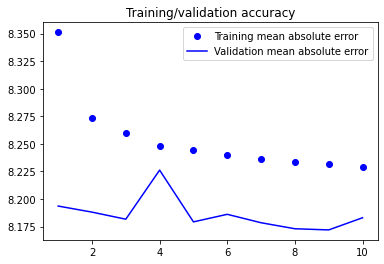

In [316]:
plt.plot(epochs, mae, 'bo', label='Training mean absolute error')
plt.plot(epochs, val_mae, 'b', label='Validation mean absolute error')
plt.title('Training/validation accuracy')
plt.legend()


plt.show()